In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data
data = pd.read_csv("C:/Users/user/Desktop/Jigyasa/META.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,206.750000,209.789993,206.270004,209.779999,209.557648,12077100
1,2020-01-03,207.210007,210.399994,206.949997,208.669998,208.448837,11188400
2,2020-01-06,206.699997,212.779999,206.520004,212.600006,212.374680,17058900
3,2020-01-07,212.820007,214.580002,211.750000,213.059998,212.834183,14912400
4,2020-01-08,213.000000,216.240005,212.610001,215.220001,214.991898,13475000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1089 non-null   object 
 1   Open       1089 non-null   float64
 2   High       1089 non-null   float64
 3   Low        1089 non-null   float64
 4   Close      1089 non-null   float64
 5   Adj Close  1089 non-null   float64
 6   Volume     1089 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 59.7+ KB


In [5]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1.089000e+03
mean,265.106492,269.017264,261.475758,265.279651,265.021994,2.474032e+07
std,89.310933,89.910210,88.447719,89.178666,89.144503,1.618508e+07
min,90.080002,90.459999,88.089996,88.910004,88.815765,5.467500e+06
25%,200.149994,203.500000,195.490005,198.860001,198.649231,1.590590e+07
50%,267.170013,270.320007,263.600006,266.630005,266.347412,2.084450e+07
75%,323.529999,328.000000,319.459991,324.170013,323.826416,2.861860e+07
max,529.280029,531.489990,518.890015,527.340027,527.340027,2.323166e+08


In [7]:
data.shape

(1089, 7)

In [8]:
data = data.drop('Adj Close', axis=1)

In [9]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2020-01-02,206.750000,209.789993,206.270004,209.779999,12077100
1,2020-01-03,207.210007,210.399994,206.949997,208.669998,11188400
2,2020-01-06,206.699997,212.779999,206.520004,212.600006,17058900
3,2020-01-07,212.820007,214.580002,211.750000,213.059998,14912400
4,2020-01-08,213.000000,216.240005,212.610001,215.220001,13475000


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


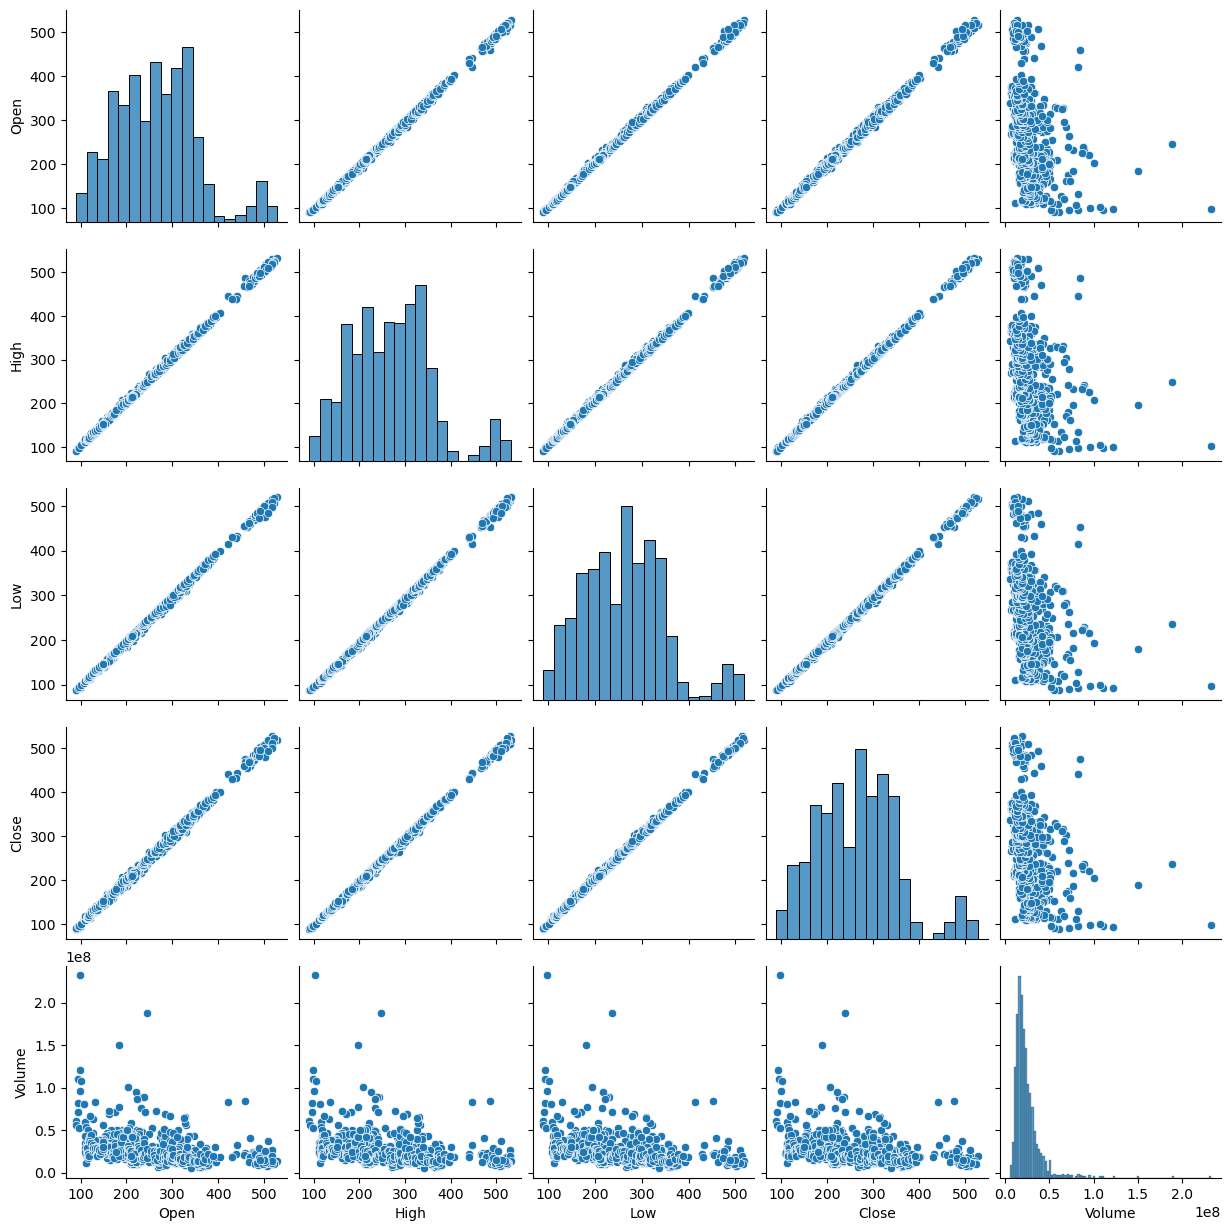

In [10]:
# Visualizing Pairplot

sns.pairplot(data)
plt.show()

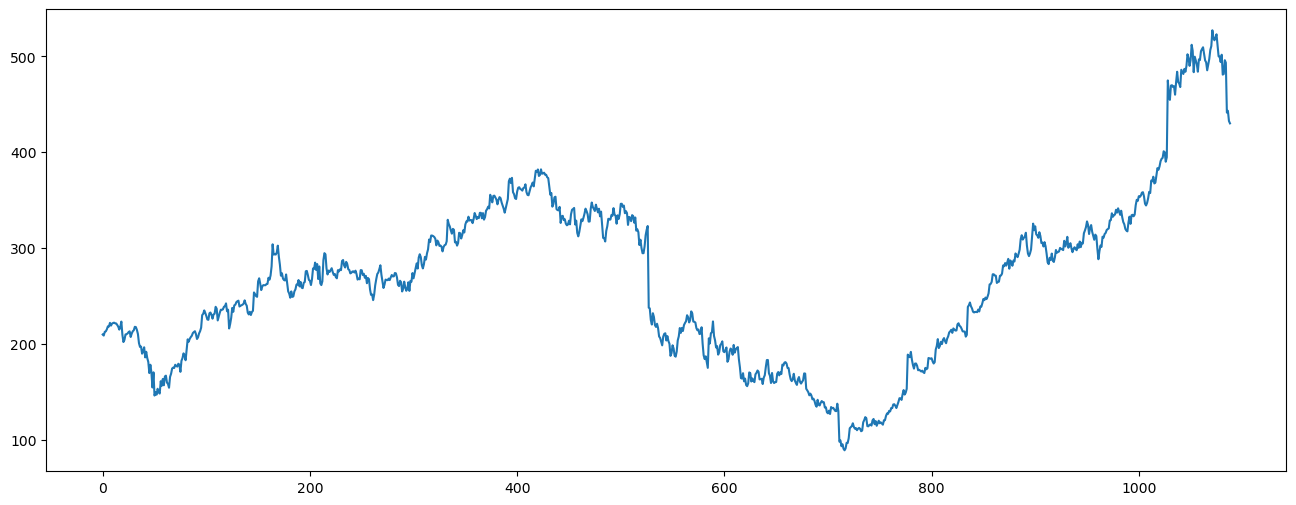

In [11]:
# Visualizing the closing prices of the data.
data['Close'].plot(figsize=(16,6))
plt.show()

In [12]:
df = data['Close']

In [13]:
df.tail()

1084    493.500000
1085    441.380005
1086    443.290009
1087    432.619995
1088    430.170013
Name: Close, dtype: float64

In [14]:
df = pd.DataFrame(df)

In [15]:
future_days = 30
df['Prediction'] = df['Close'].shift(-future_days)

In [16]:
df.tail()

,Close,Prediction
1084,493.500000,NaN
1085,441.380005,NaN
1086,443.290009,NaN
1087,432.619995,NaN
1088,430.170013,NaN


In [17]:
X = np.array(df.drop(['Prediction'], axis = 1))[:-future_days]
print(X)

[[209.779999]
 [208.669998]
 [212.600006]
 ...
 [491.829987]
 [484.100006]
 [496.980011]]


In [18]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[214.179993 217.800003 217.490005 ... 443.290009 432.619995 430.170013]


In [19]:
# Retrieving indepedent and dependent variable
# X - Independent variable
# y - Dependent variable
X = data[['High','Open','Low','Volume']]
y = data[['Close']]

In [20]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
X_train

,High,Open,Low,Volume
129,246.990005,238.110001,236.589996,29791300
236,286.429993,286.010010,281.549988,10747700
335,328.549988,326.170013,321.839996,18719500
741,117.540001,115.300003,113.870003,26033400
983,339.380005,333.399994,333.399994,12637200
...,...,...,...,...
904,317.070007,313.230011,310.459991,16236500
987,320.859985,317.290009,313.660004,19037100
296,265.579987,265.549988,255.050003,18391800
563,224.039993,222.130005,219.539993,26224100


In [23]:
X_test

,High,Open,Low,Volume
549,196.699997,187.850006,186.110001,37508100
564,230.889999,226.070007,225.289993,31417900
1080,512.210022,499.820007,499.040009,14808700
131,245.490005,243.690002,239.320007,22982700
847,240.259995,236.919998,235.330002,20653200
...,...,...,...,...
913,285.690002,279.029999,274.380005,34061200
429,377.559998,377.000000,367.670013,17940300
357,327.380005,325.779999,323.480011,12610800
222,277.679993,277.679993,273.290009,15040300


In [24]:
y_train

,Close
129,243.580002
236,283.399994
335,322.579987
741,115.900002
983,338.989990
...,...
904,316.559998
987,320.019989
296,255.309998
563,223.589996


In [25]:
y_test

,Close
549,190.289993
564,229.860001
1080,501.799988
131,245.070007
847,238.860001
...,...
913,283.250000
429,373.920013
357,326.040009
222,275.000000


In [26]:
#Training the linear regression model and decision tree regressor on training set
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [27]:
regressor = LinearRegression()
tree = DecisionTreeRegressor()

In [28]:
regressor.fit(X_train , y_train)

LinearRegression()

In [29]:
tree.fit(X_train, y_train)


DecisionTreeRegressor()

In [30]:
predict = regressor.predict(X_test)

In [31]:
# Ensure y_test and prediction are numpy arrays
if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
    y_test = y_test.values
if isinstance(predict, pd.DataFrame) or isinstance(predict, pd.Series):
    prediction = predict.values

# Flatten the numpy arrays
y_test_flat = y_test.flatten()
prediction_flat = predict.flatten()

# Create the DataFrame with the actual and predicted values
dframe = pd.DataFrame({'Actual': y_test_flat, 'Predicted': prediction_flat})

# Display the DataFrame
print(dframe)


         Actual   Predicted
0    190.289993  193.317156
1    229.860001  229.070076
2    501.799988  508.992060
3    245.070007  241.543460
4    238.860001  238.190195
..          ...         ...
213  283.250000  280.480571
214  373.920013  370.018214
215  326.040009  325.140461
216  275.000000  274.124978
217  181.279999  179.200672

[218 rows x 2 columns]


In [32]:
dframe

,Actual,Predicted
0,190.289993,193.317156
1,229.860001,229.070076
2,501.799988,508.992060
3,245.070007,241.543460
4,238.860001,238.190195
...,...,...
213,283.250000,280.480571
214,373.920013,370.018214
215,326.040009,325.140461
216,275.000000,274.124978


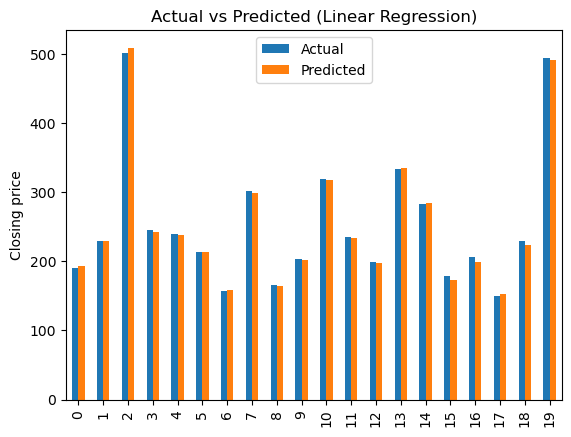

In [33]:
# Graph showing actual vs predicted closing price by Linear regression
graph =dframe.head(20)
graph.plot(kind='bar')
plt.title('Actual vs Predicted (Linear Regression)')
plt.ylabel('Closing price')
plt.show()

In [34]:
predict = tree.predict(X_test)

In [35]:
# Ensure y_test and prediction are numpy arrays
if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
    y_test = y_test.values
if isinstance(predict, pd.DataFrame) or isinstance(predict, pd.Series):
    prediction = predict.values

# Flatten the numpy arrays
y_test_flat = y_test.flatten()
prediction_flat = predict.flatten()

# Create the DataFrame with the actual and predicted values
dframe = pd.DataFrame({'Actual': y_test_flat, 'Predicted': prediction_flat})

# Display the DataFrame
print(dframe)

         Actual   Predicted
0    190.289993  186.059998
1    229.860001  227.850006
2    501.799988  506.739990
3    245.070007  239.240005
4    238.860001  236.729996
..          ...         ...
213  283.250000  280.829987
214  373.920013  373.279999
215  326.040009  324.820007
216  275.000000  275.670013
217  181.279999  183.089996

[218 rows x 2 columns]


In [36]:
dframe

,Actual,Predicted
0,190.289993,186.059998
1,229.860001,227.850006
2,501.799988,506.739990
3,245.070007,239.240005
4,238.860001,236.729996
...,...,...
213,283.250000,280.829987
214,373.920013,373.279999
215,326.040009,324.820007
216,275.000000,275.670013


<Figure size 1600x800 with 0 Axes>

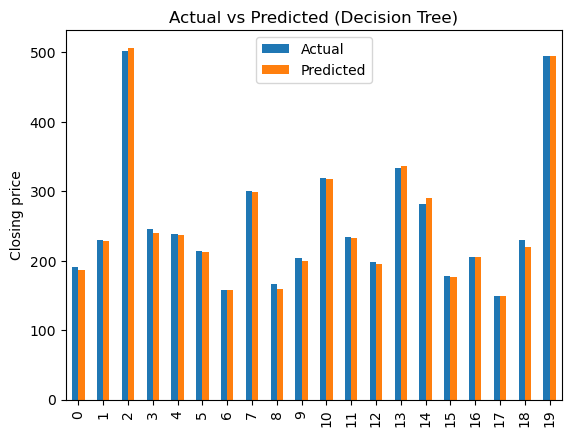

In [37]:
# Graph showing actual vs predicted closing price by Decision tree
plt.figure(figsize=(16,8))
graph =dframe.head(20)
graph.plot(kind='bar')
plt.title('Actual vs Predicted (Decision Tree)')
plt.ylabel('Closing price')
plt.show()

In [38]:

x_future = data[['High','Low', 'Open', 'Volume']].tail(future_days)
x_future = np.array(x_future)
x_future


array([[4.96630005e+02, 4.81279999e+02, 4.88170013e+02, 1.09031000e+07],
       [5.08200012e+02, 4.95170013e+02, 4.99500000e+02, 1.17111000e+07],
       [5.15039978e+02, 5.06010010e+02, 5.14710022e+02, 9.71250000e+06],
       [5.09970001e+02, 5.04339996e+02, 5.07000000e+02, 8.11700000e+06],
       [5.07220001e+02, 5.00239990e+02, 5.05790009e+02, 8.38060000e+06],
       [5.10000000e+02, 4.95209991e+02, 5.05130005e+02, 1.12054000e+07],
       [4.99890015e+02, 4.88070007e+02, 4.99299988e+02, 9.98970000e+06],
       [4.92890015e+02, 4.85149994e+02, 4.92839996e+02, 1.52128000e+07],
       [4.97429993e+02, 4.81779999e+02, 4.87200012e+02, 9.24700000e+06],
       [4.97529999e+02, 4.84649994e+02, 4.85100006e+02, 1.10810000e+07],
       [5.07239990e+02, 4.98750000e+02, 4.98929993e+02, 1.20992000e+07],
       [5.30000000e+02, 5.10579987e+02, 5.16419983e+02, 2.64763000e+07],
       [5.30700012e+02, 5.14409973e+02, 5.16859985e+02, 1.92420000e+07],
       [5.31489990e+02, 5.18890015e+02, 5.29280029e

In [39]:
future_days = 30  # Number of days to predict By Linear Regression
x_future = data[['High', 'Low', 'Open', 'Volume']].tail(future_days)
x_future = np.array(x_future)

In [40]:
x_future 

array([[4.96630005e+02, 4.81279999e+02, 4.88170013e+02, 1.09031000e+07],
       [5.08200012e+02, 4.95170013e+02, 4.99500000e+02, 1.17111000e+07],
       [5.15039978e+02, 5.06010010e+02, 5.14710022e+02, 9.71250000e+06],
       [5.09970001e+02, 5.04339996e+02, 5.07000000e+02, 8.11700000e+06],
       [5.07220001e+02, 5.00239990e+02, 5.05790009e+02, 8.38060000e+06],
       [5.10000000e+02, 4.95209991e+02, 5.05130005e+02, 1.12054000e+07],
       [4.99890015e+02, 4.88070007e+02, 4.99299988e+02, 9.98970000e+06],
       [4.92890015e+02, 4.85149994e+02, 4.92839996e+02, 1.52128000e+07],
       [4.97429993e+02, 4.81779999e+02, 4.87200012e+02, 9.24700000e+06],
       [4.97529999e+02, 4.84649994e+02, 4.85100006e+02, 1.10810000e+07],
       [5.07239990e+02, 4.98750000e+02, 4.98929993e+02, 1.20992000e+07],
       [5.30000000e+02, 5.10579987e+02, 5.16419983e+02, 2.64763000e+07],
       [5.30700012e+02, 5.14409973e+02, 5.16859985e+02, 1.92420000e+07],
       [5.31489990e+02, 5.18890015e+02, 5.29280029e

In [41]:
future_prediction = regressor.predict(x_future)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
future_indexes = np.arange(len(data), len(data) + future_days)


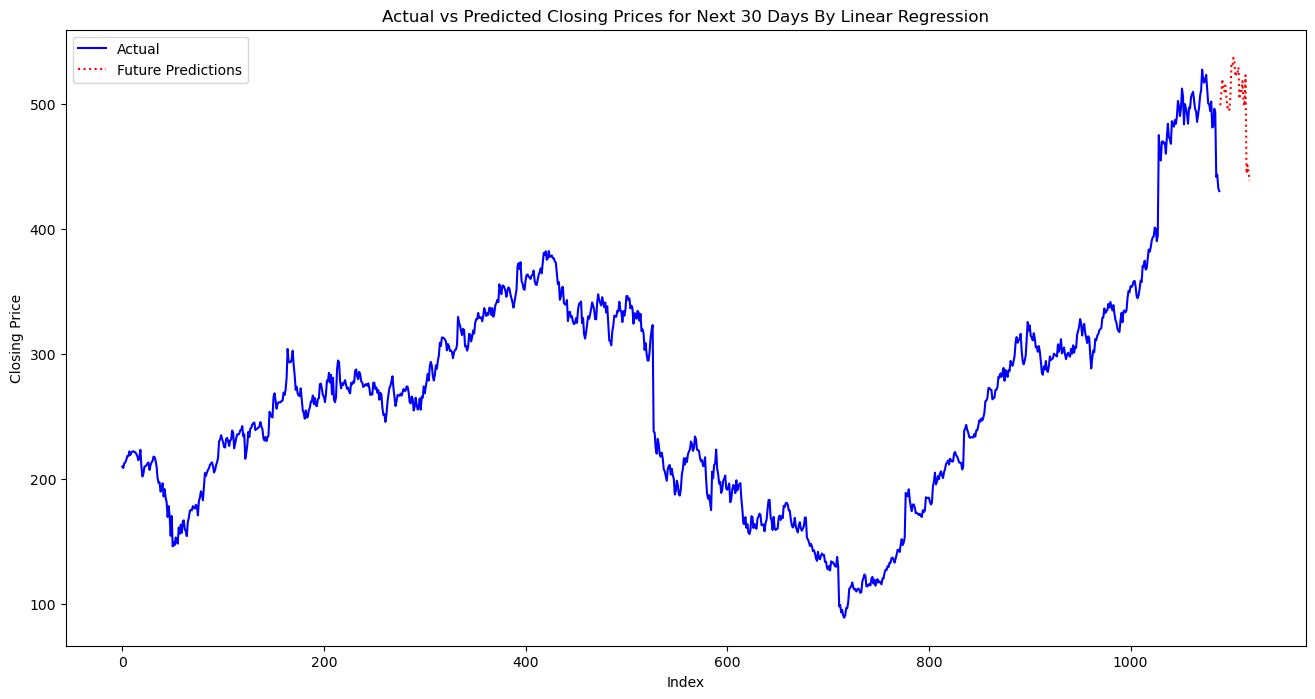

In [43]:
plt.figure(figsize=(16, 8))
plt.plot(data.index, data['Close'], label='Actual', color='blue')  # Plot actual data
plt.plot(future_indexes, future_prediction, label='Future Predictions', color='red', linestyle=':')
plt.title('Actual vs Predicted Closing Prices for Next 30 Days By Linear Regression')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [44]:
future_prediction = tree.predict(x_future)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [45]:
x_future

array([[4.96630005e+02, 4.81279999e+02, 4.88170013e+02, 1.09031000e+07],
       [5.08200012e+02, 4.95170013e+02, 4.99500000e+02, 1.17111000e+07],
       [5.15039978e+02, 5.06010010e+02, 5.14710022e+02, 9.71250000e+06],
       [5.09970001e+02, 5.04339996e+02, 5.07000000e+02, 8.11700000e+06],
       [5.07220001e+02, 5.00239990e+02, 5.05790009e+02, 8.38060000e+06],
       [5.10000000e+02, 4.95209991e+02, 5.05130005e+02, 1.12054000e+07],
       [4.99890015e+02, 4.88070007e+02, 4.99299988e+02, 9.98970000e+06],
       [4.92890015e+02, 4.85149994e+02, 4.92839996e+02, 1.52128000e+07],
       [4.97429993e+02, 4.81779999e+02, 4.87200012e+02, 9.24700000e+06],
       [4.97529999e+02, 4.84649994e+02, 4.85100006e+02, 1.10810000e+07],
       [5.07239990e+02, 4.98750000e+02, 4.98929993e+02, 1.20992000e+07],
       [5.30000000e+02, 5.10579987e+02, 5.16419983e+02, 2.64763000e+07],
       [5.30700012e+02, 5.14409973e+02, 5.16859985e+02, 1.92420000e+07],
       [5.31489990e+02, 5.18890015e+02, 5.29280029e

In [46]:
future_days = 30  # Number of days to predict By Decision Tree
x_future = data[['High', 'Low', 'Open', 'Volume']].tail(future_days)
x_future = np.array(x_future)


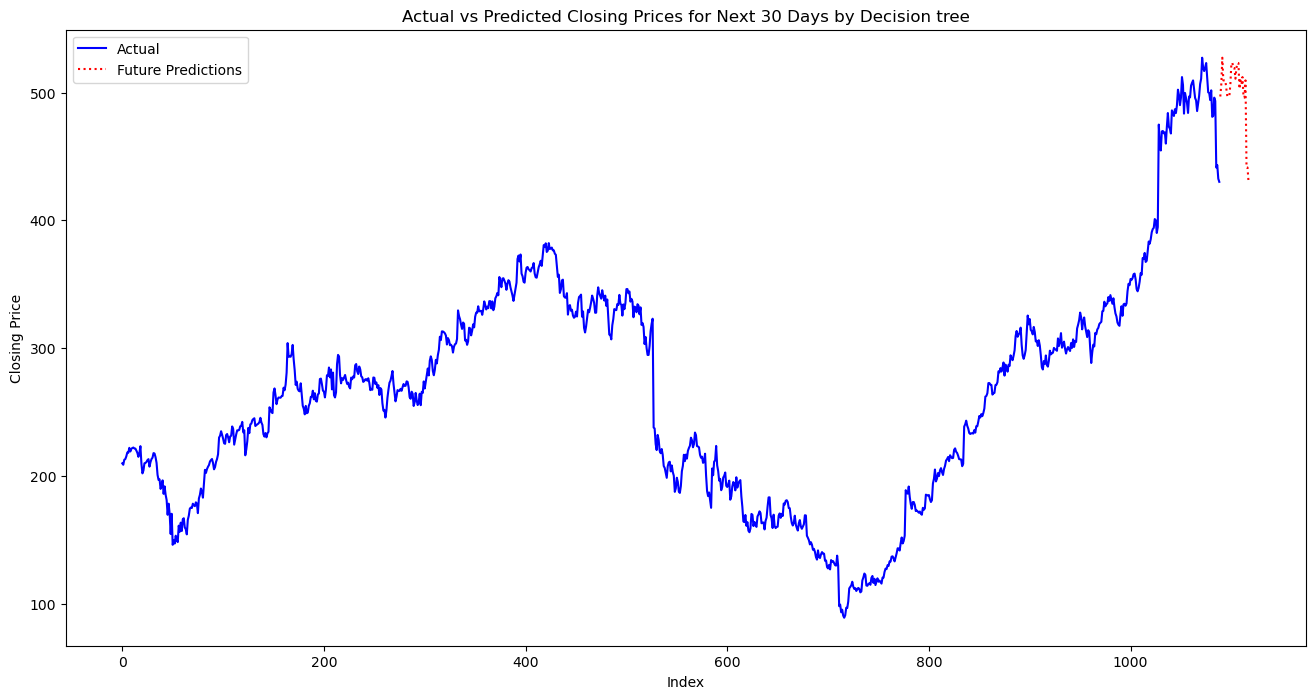

In [47]:
plt.figure(figsize=(16, 8))
plt.plot(data.index, data['Close'], label='Actual', color='blue')  # Plot actual data
plt.plot(future_indexes, future_prediction, label='Future Predictions', color='red', linestyle=':')
plt.title('Actual vs Predicted Closing Prices for Next 30 Days by Decision tree')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting the test set results with the Linear Regression model
y_pred_lr = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

# Calculating accuracy for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

#calculating overfitting
r2_train = r2_score(y_train, y_train_pred)

print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression R-Squared (Test): {r2_lr}")
print(f"Linear Regression R-Squared (Train): {r2_train}")


Linear Regression Mean Squared Error: 4.69861374743862
Linear Regression R-Squared (Test): 0.9993614728127462
Linear Regression R-Squared (Train): 0.9993838431232653


In [53]:
# Predicting the test set results with Decision Tree
y_pred = tree.predict(X_test)
y_train_pred_dt = regressor.predict(X_train)

# Calculating accuracy with Decision Tree
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#calculating overfitting
r2_train_dt = r2_score(y_train, y_train_pred_dt)

print(f"Decision Tree Mean Squared Error: {mse}")
print(f"Decision Tree R-Sqaured (Test) : {r2}")
print(f"Decision tree R-Squared (Train): {r2_train_dt}")


Decision Tree Mean Squared Error: 12.640665946428738
Decision Tree R-Sqaured (Test) : 0.9982821722947139
Decision tree R-Squared (Train): 0.9993838431232653
